In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/WhiteHat/malicious_phish_data_step2.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# 결측치 대체
# count 관련 변수들은 0으로 대체
df['count_sub_domain'].fillna(0, inplace=True)
df['count_url_dots'].fillna(0, inplace=True)

# port 번호, private 유무는 최빈값으로 대체
mode_port = df['num_port'].mode()[0]  # 최빈값(가장 빈도 높은 값)을 추출
print(mode_port)
df['num_port'].fillna(mode_port, inplace=True)
mode_private = df['is_private'].mode()[0]
print(mode_private)
df['is_private'].fillna(mode_private, inplace=True)

# 루트 도메인 길이, 알파벳/숫자 비율은 중앙값으로 대체
df['ratio_alpha_numeric'].fillna(df['ratio_alpha_numeric'].median(), inplace=True)
df['len_root_domain'].fillna(df['len_root_domain'].median(), inplace=True)

# 결측치가 처리되었는지 확인
print(df.isnull().sum())

80.0
0.0
type                   0
len_url                0
len_sub_domain         0
len_root_domain        0
len_suffix             0
is_private             0
count_special_char     0
num_port               0
len_query              0
is_ip                  0
count_sub_domain       0
is_filter              0
ratio_alpha_numeric    0
count_url_dots         0
value_entropy_url      0
len_encoding           0
count_file_path        0
dtype: int64


In [ ]:
def remove_outliers_iqr(data, col_list, iqr_factor):
    """
    IQR 기준을 활용해 이상치를 제거하는 함수 예시
    :param col_list: 이상치 제거를 적용할 수치형 컬럼 리스트
    :param iqr_factor: 1.5, 3 등 IQR 배수
    :return: 이상치 제거 후의 DataFrame
    """
    df_filtered = data.copy()

    for col in col_list:
        Q1 = df_filtered[col].quantile(0.25)  # 1사분위
        Q3 = df_filtered[col].quantile(0.75)  # 3사분위
        IQR = Q3 - Q1

        lower_bound = Q1 - iqr_factor * IQR
        upper_bound = Q3 + iqr_factor * IQR

        # 범위를 벗어나는 데이터(이상치) 행 제거
        df_filtered = df_filtered[
            (df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)
        ]

    return df_filtered

# 실제 제거 적용
numeric_cols = ['count_special_char', 'ratio_alpha_numeric', 'len_encoding']
df_no_outlier = remove_outliers_iqr(df, numeric_cols, 3)

#print("이상치 제거 전:", df.shape)
#print("이상치 제거 후:", df_no_outlier.shape)
df_no_outlier.head()

df = df_no_outlier
df.describe()

,len_url,len_sub_domain,len_root_domain,len_suffix,is_private,count_special_char,num_port,len_query,count_sub_domain,is_filter,ratio_alpha_numeric,count_url_dots,value_entropy_url,len_encoding,count_file_path
count,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.0,9245.000000
mean,57.813953,2.048350,10.155435,3.215251,0.017631,3.419794,81.759870,9.588643,0.353813,0.371769,0.073031,1.936723,4.217194,0.0,2.253975
std,34.617418,5.503622,4.862893,1.419392,0.131614,4.211210,84.333295,25.385911,0.697067,0.483303,0.100677,1.210887,0.388850,0.0,1.526333
min,7.000000,0.000000,1.000000,2.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.0,0.000000
25%,33.000000,0.000000,7.000000,3.000000,0.000000,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.986188,0.0,1.000000
50%,48.000000,0.000000,9.000000,3.000000,0.000000,2.000000,80.000000,0.000000,0.000000,0.000000,0.038462,2.000000,4.240963,0.0,2.000000
75%,77.000000,3.000000,13.000000,3.000000,0.000000,5.000000,80.000000,0.000000,1.000000,1.000000,0.112500,2.000000,4.485985,0.0,3.000000
max,286.000000,117.000000,59.000000,20.000000,1.000000,24.000000,8001.000000,242.000000,10.000000,1.000000,0.500000,17.000000,5.814837,0.0,15.000000


In [ ]:
df.describe(include='all')

,type,len_url,len_sub_domain,len_root_domain,len_suffix,is_private,count_special_char,num_port,len_query,is_ip,count_sub_domain,is_filter,ratio_alpha_numeric,count_url_dots,value_entropy_url,len_encoding,count_file_path
count,9245,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.0,9245.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STRING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,57.813953,2.048350,10.155435,3.215251,0.017631,3.419794,81.759870,9.588643,NaN,0.353813,0.371769,0.073031,1.936723,4.217194,0.0,2.253975
std,NaN,34.617418,5.503622,4.862893,1.419392,0.131614,4.211210,84.333295,25.385911,NaN,0.697067,0.483303,0.100677,1.210887,0.388850,0.0,1.526333
min,NaN,7.000000,0.000000,1.000000,2.000000,0.000000,0.000000,80.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,2.500000,0.0,0.000000
25%,NaN,33.000000,0.000000,7.000000,3.000000,0.000000,0.000000,80.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,3.986188,0.0,1.000000
50%,NaN,48.000000,0.000000,9.000000,3.000000,0.000000,2.000000,80.000000,0.000000,NaN,0.000000,0.000000,0.038462,2.000000,4.240963,0.0,2.000000
75%,NaN,77.000000,3.000000,13.000000,3.000000,0.000000,5.000000,80.000000,0.000000,NaN,1.000000,1.000000,0.112500,2.000000,4.485985,0.0,3.000000


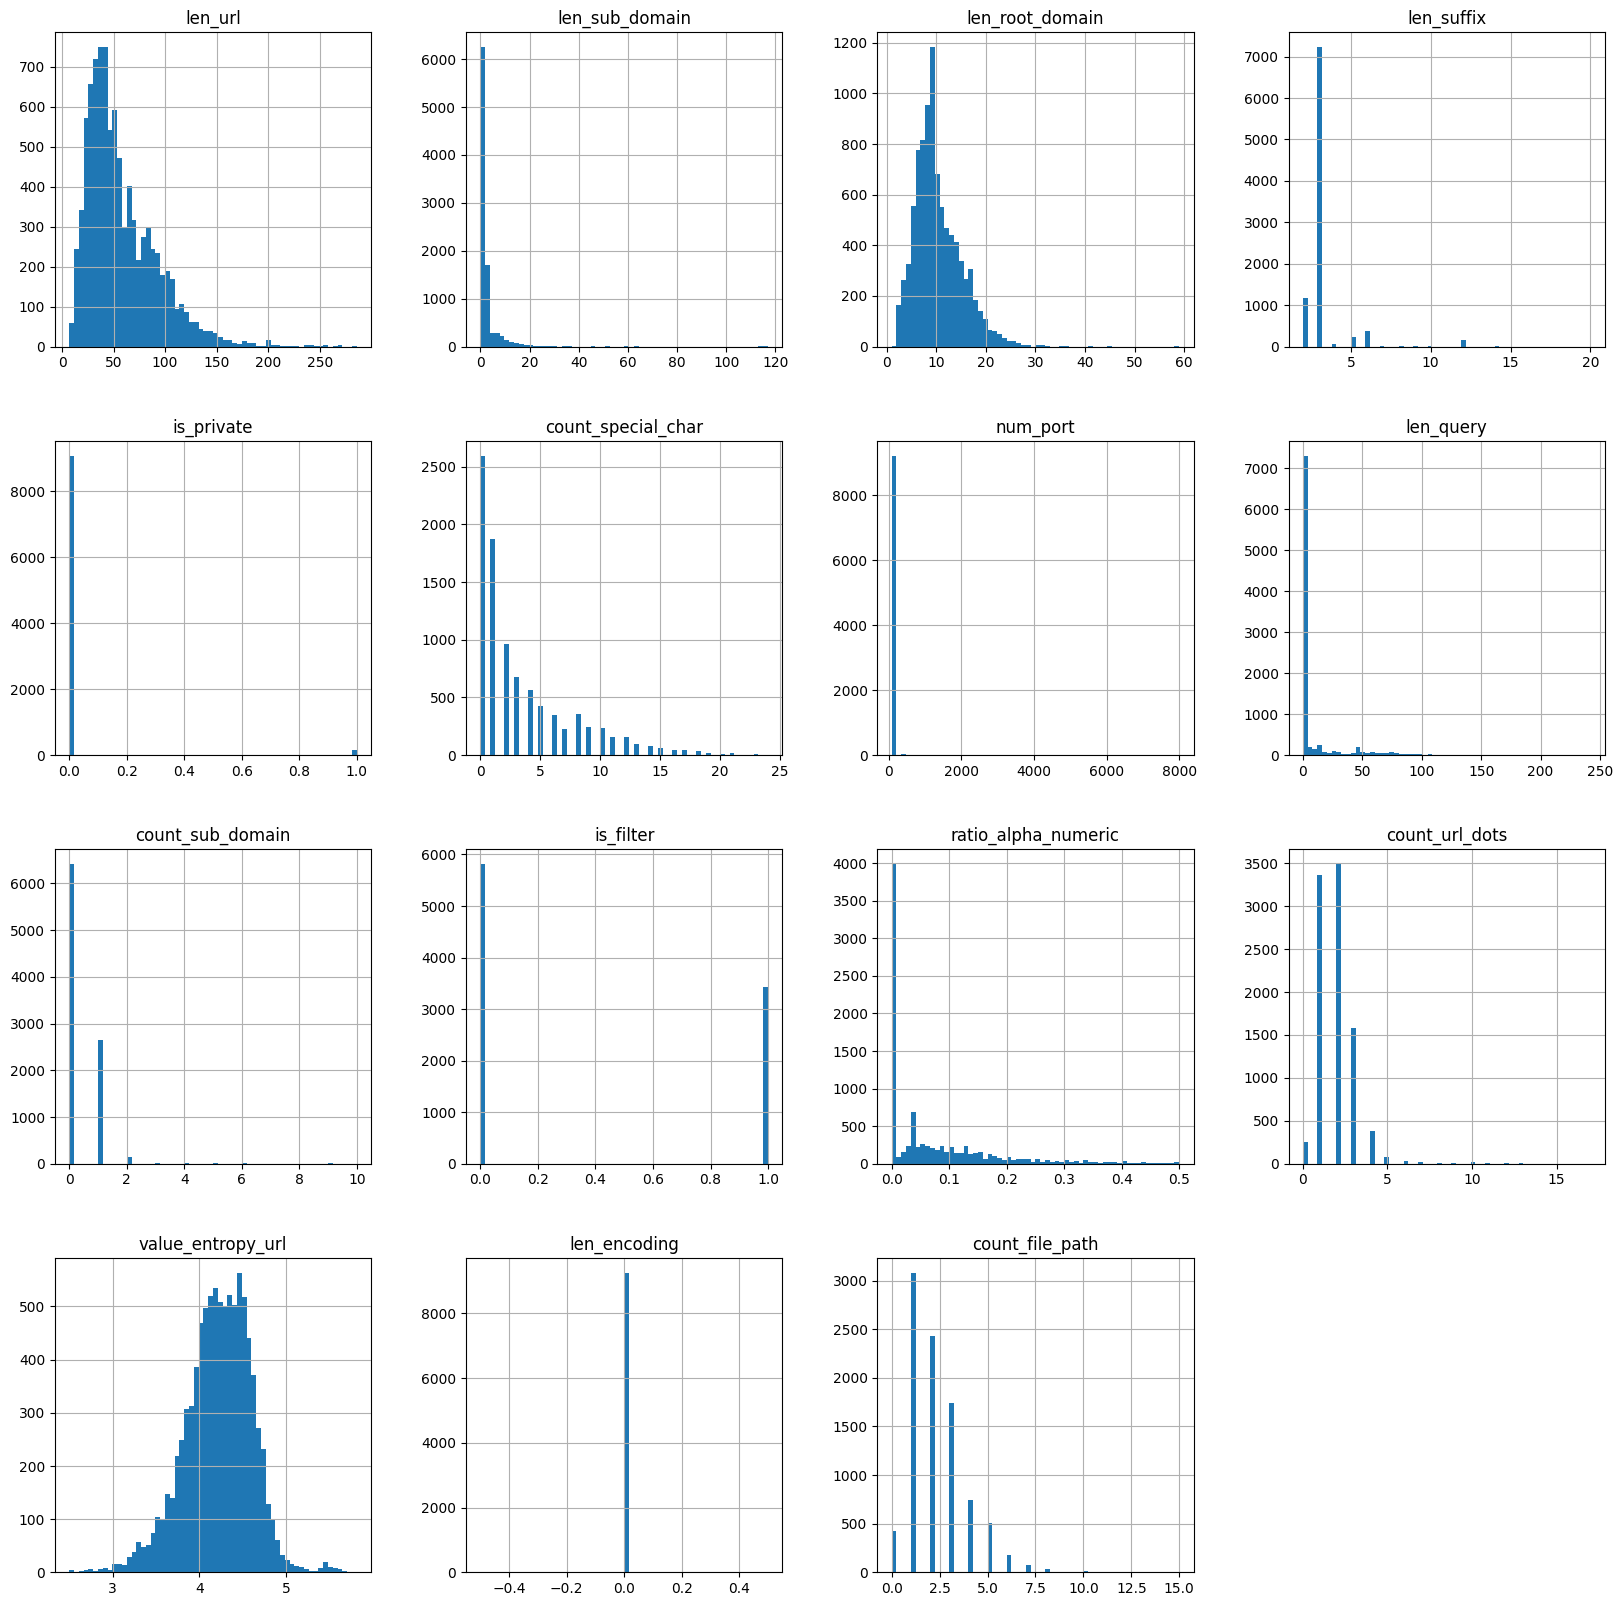

In [ ]:
df.hist(bins=60, grid=True, figsize=(20,20))
plt.show()

In [ ]:
df_copy = df.copy()
df_copy.head()
df.describe(include='all')

,type,len_url,len_sub_domain,len_root_domain,len_suffix,is_private,count_special_char,num_port,len_query,is_ip,count_sub_domain,is_filter,ratio_alpha_numeric,count_url_dots,value_entropy_url,len_encoding,count_file_path
count,9245,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245,9245.000000,9245.000000,9245.000000,9245.000000,9245.000000,9245.0,9245.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STRING,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,57.813953,2.048350,10.155435,3.215251,0.017631,3.419794,81.759870,9.588643,NaN,0.353813,0.371769,0.073031,1.936723,4.217194,0.0,2.253975
std,NaN,34.617418,5.503622,4.862893,1.419392,0.131614,4.211210,84.333295,25.385911,NaN,0.697067,0.483303,0.100677,1.210887,0.388850,0.0,1.526333
min,NaN,7.000000,0.000000,1.000000,2.000000,0.000000,0.000000,80.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,2.500000,0.0,0.000000
25%,NaN,33.000000,0.000000,7.000000,3.000000,0.000000,0.000000,80.000000,0.000000,NaN,0.000000,0.000000,0.000000,1.000000,3.986188,0.0,1.000000
50%,NaN,48.000000,0.000000,9.000000,3.000000,0.000000,2.000000,80.000000,0.000000,NaN,0.000000,0.000000,0.038462,2.000000,4.240963,0.0,2.000000
75%,NaN,77.000000,3.000000,13.000000,3.000000,0.000000,5.000000,80.000000,0.000000,NaN,1.000000,1.000000,0.112500,2.000000,4.485985,0.0,3.000000


In [ ]:
# 텍스트 데이터를 value_counts() 함수를 통해 유일한 값 확인

#print(df.value_counts())

df['type'] = df['type'].replace({'benign' : 0, 'malware' : 1, 'defacement' : 1, 'phishing' : 1})
df['is_ip'] = df['is_ip'].replace({'STRING' : 0, 'IP' : 1})

print(df.value_counts())
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경
# value_counts는 고유값을 기준으로 각 행의 데이터를 반환 (마지막 1은 빈도 수)

type  len_url  len_sub_domain  len_root_domain  len_suffix  is_private  count_special_char  num_port  len_query  is_ip  count_sub_domain  is_filter  ratio_alpha_numeric  count_url_dots  value_entropy_url  len_encoding  count_file_path
0     15       0               10.0             3           0.0         0                   80.0      0          0      0.0               0          0.000000             1.0             3.189898           0             1                  3
1     13       0               9.0              3           0.0         0                   80.0      0          0      0.0               0          0.000000             1.0             3.392747           0             0                  3
                                                                                                                                                                                          3.180833           0             0                  3
0     21       0               16.0          

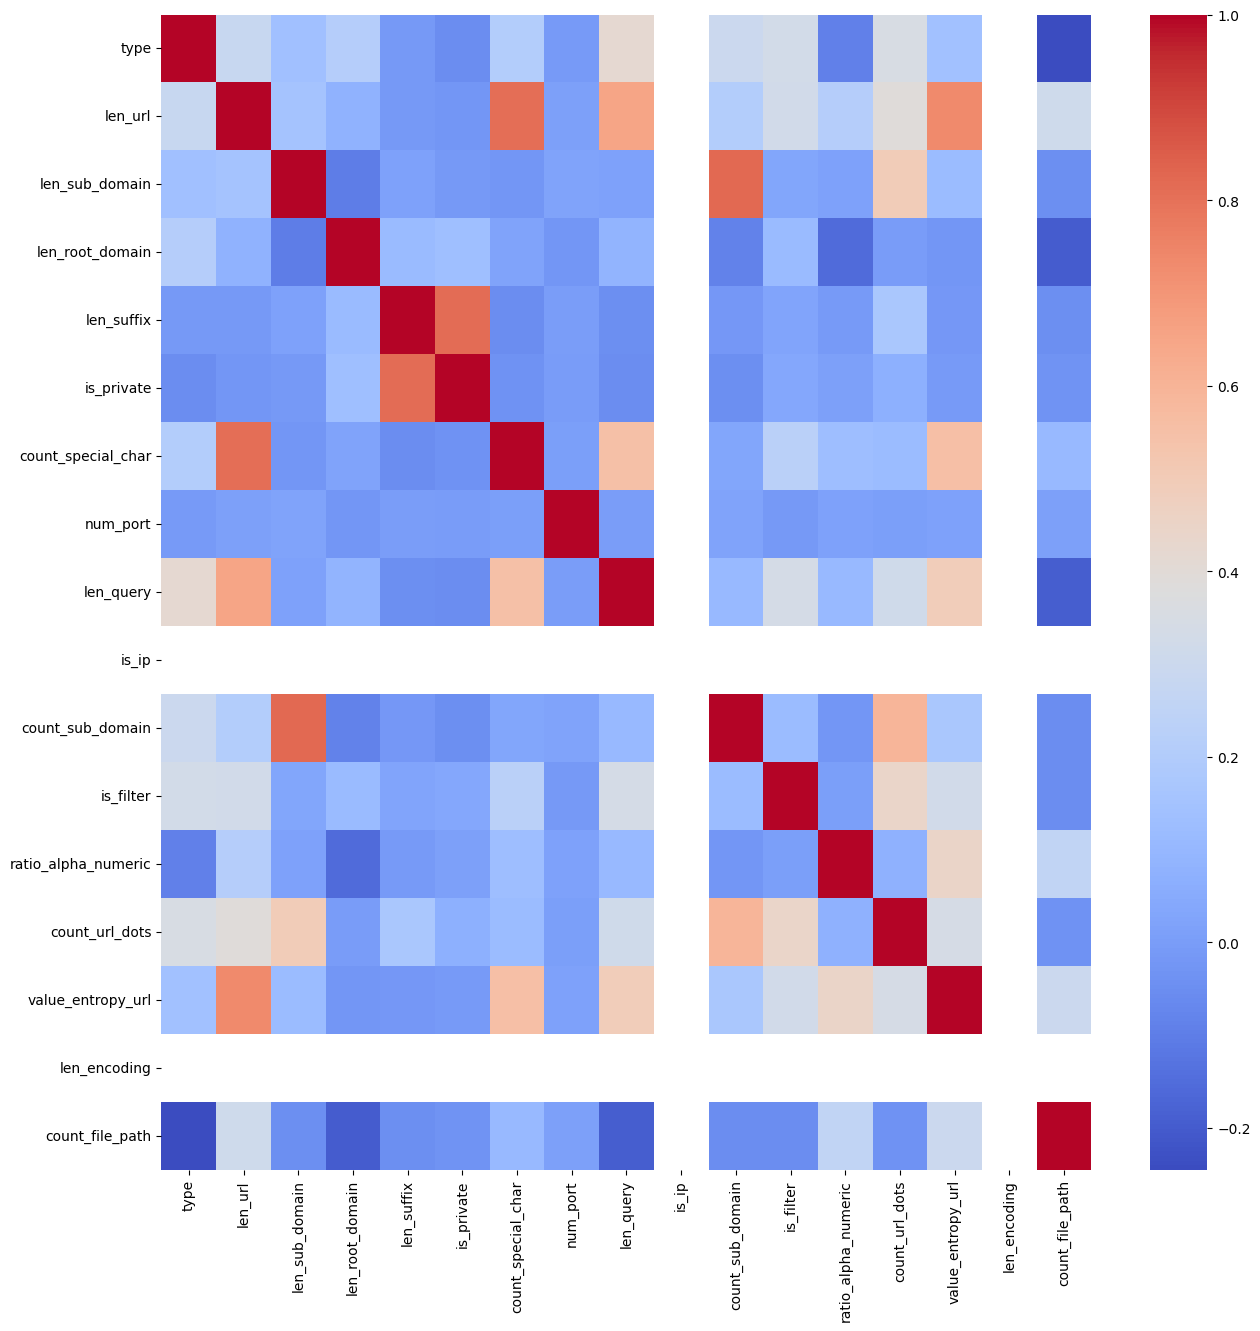

In [ ]:
# 상관관계 분석
df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),cmap="coolwarm")
plt.show()

In [ ]:
# 'type'을 기준으로 상관 관계를 내림차순으로 정렬
corr_matrix = df.corr()
corr_with_label = corr_matrix['type'].sort_values(ascending=False)

#print(corr_with_label)
# ----------------
# 상관계수가 NaN인 열을 확인하고 삭제

# corr_matrix.isna().any(): 상관관계 행렬에서 결측치(NaN)가 있는 열들을 검색
# isna()는 데이터에 NaN 값이 있는지 확인하는 함수
# any()는 열(컬럼) 단위로 하나라도 NaN 값이 있으면 True를 반환

nan_columns = corr_matrix['type'][corr_matrix['type'].isna()].index.tolist()

#print(f"NaN 상관관계를 가진 변수들: {nan_columns}")

# 해당 열들을 데이터프레임에서 삭제
df.drop(columns=nan_columns, axis=1, inplace=True)

# 데이터프레임 확인
print(df.tail())



       type  len_url  len_sub_domain  len_root_domain  len_suffix  is_private  \
10243     0       90               5              8.0           3         0.0   
10244     0       69               0              3.0           3         0.0   
10245     1       71               3             10.0           3         0.0   
10246     1       69               3             12.0           2         0.0   
10247     0       29               0              6.0           3         0.0   

       count_special_char  num_port  len_query  count_sub_domain  is_filter  \
10243                   9      80.0          0               1.0          0   
10244                   6      80.0          0               0.0          0   
10245                   1      80.0          0               1.0          0   
10246                   1      80.0          0               1.0          1   
10247                   0      80.0          0               0.0          0   

       ratio_alpha_numeric  count_url_

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# df에서 'type' 열 제외하고 df_scaler 생성
df_scaler = df.drop(columns=['type'])
print("df의 타입", type(df))
print("df_scaler의 타입", type(df_scaler))

# 1. 숫자형 컬럼에 표준화(Standardization) 적용
scaler = StandardScaler()
df_standardized = df_scaler.copy()
df_standardized[:] = scaler.fit_transform(df_standardized)

# 2. L2 정규화(L2 Normalization) 적용
normalizer = Normalizer(norm='l2')
df_normalized = df_standardized.copy()
df_normalized[:] = normalizer.fit_transform(df_standardized)

# 3. 변환된 데이터를 원래 df에 반영 (type은 그대로 유지)
df.update(df_normalized)

# 최종 확인
print(df.tail())


df의 타입 <class 'pandas.core.frame.DataFrame'>
df_scaler의 타입 <class 'pandas.core.frame.DataFrame'>
       type   len_url  len_sub_domain  len_root_domain  len_suffix  \
10243     0  0.322361        0.185946        -0.153677   -0.052579   
10244     0  0.116568       -0.134261        -0.530807   -0.054707   
10245     1  0.108372        0.049196        -0.009094   -0.043146   
10246     1  0.110740        0.059258         0.129993   -0.293417   
10247     0 -0.352391       -0.157569        -0.361775   -0.064204   

       is_private  count_special_char  num_port  len_query  count_sub_domain  \
10243   -0.046446            0.459424 -0.007235  -0.130959          0.321406   
10244   -0.048325            0.221026 -0.007528  -0.136257         -0.183103   
10245   -0.038113           -0.163482 -0.005937  -0.107464          0.263743   
10246   -0.045909           -0.196922 -0.007152  -0.129445          0.317692   
10247   -0.056715           -0.343803 -0.008835  -0.159912         -0.214890   

 

---------------------------------------------------

In [ ]:
# Feature는 Target('type') 제외한 나머지
x = df.drop(columns=['type'])

# Target은 악성/정상
y = df['type']

In [ ]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 데이터 Set 나누기 (Train:Test = 8:2)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=77)

#random_state 없으면 매번 다른 값이 나옴
x_train

,len_url,len_sub_domain,len_root_domain,len_suffix,is_private,count_special_char,num_port,len_query,count_sub_domain,is_filter,ratio_alpha_numeric,count_url_dots,value_entropy_url,count_file_path
6240,-0.159323,-0.148598,0.479859,-0.341838,-0.053485,-0.134609,-0.008332,-0.150807,-0.202654,0.518987,-0.289621,0.020864,-0.243512,-0.328017
1146,-0.207677,0.066074,-0.090793,-0.327165,-0.051190,-0.219571,-0.007974,-0.144334,0.354232,0.496711,-0.006081,-0.611177,-0.125208,-0.063584
3062,-0.085740,0.700839,0.258238,0.421547,-0.028783,-0.174484,-0.004484,-0.081157,0.199180,-0.165278,-0.102506,0.188671,-0.073728,-0.317294
5241,0.353732,-0.098676,0.046046,-0.040207,-0.035517,0.414277,-0.005533,0.641378,-0.134573,0.344634,-0.128867,0.013855,0.275665,-0.217820
507,0.475789,-0.135663,0.363132,-0.055277,-0.048830,0.309889,-0.007607,-0.137679,-0.185014,0.473810,0.040936,0.019048,0.261232,0.416971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5280,0.298664,-0.131843,0.061523,-0.053721,-0.047455,0.721760,-0.007392,-0.133803,-0.179805,0.460471,-0.097030,0.018512,-0.082334,-0.291033
10111,-0.272471,-0.141473,-0.637487,-0.057645,-0.050921,-0.128156,-0.007932,-0.143577,-0.192938,-0.292396,-0.275736,-0.294054,-0.369596,0.185790
8646,-0.332778,-0.139142,0.449324,-0.056695,-0.050082,-0.303596,-0.007802,-0.141210,-0.189759,-0.287578,-0.271192,-0.289208,-0.519948,-0.062208
2493,-0.360210,-0.137249,0.139879,-0.055924,-0.049401,-0.211897,-0.007695,-0.052130,-0.187177,-0.283666,0.648217,-0.285274,-0.264091,-0.302966


In [ ]:
from xgboost import XGBClassifier

# 모델 선언
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 모델 학습하기
model_xgb.fit(x_train, y_train)

# 예측하기
pred_xgb = model_xgb.predict(x_test)

# 예측 결과 확인
pred_xgb

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
# 라이브러리 불러오기
from sklearn.metrics import classification_report, f1_score, confusion_matrix
print(confusion_matrix(y_test, pred_xgb))
print(classification_report(y_test, pred_xgb))
#print("F1 Score : ", f1_score(y_test, pred_dt))

#Prcision (정밀도)가 중요한 케이스는 "문제가 없는데 있다고 하는 지표를 낮춰야 함"
#ex) 스팸 이메일 필터링, 금융 사기 감지

#Recall (재현율)이 중요한 케이스는 "문제가 있는데 없다고 하는 지표를 낮춰야 함"
#ex) 의료 진단(암 진단), 범죄 수사

[[1354   16]
 [  65  414]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1370
           1       0.96      0.86      0.91       479

    accuracy                           0.96      1849
   macro avg       0.96      0.93      0.94      1849
weighted avg       0.96      0.96      0.96      1849



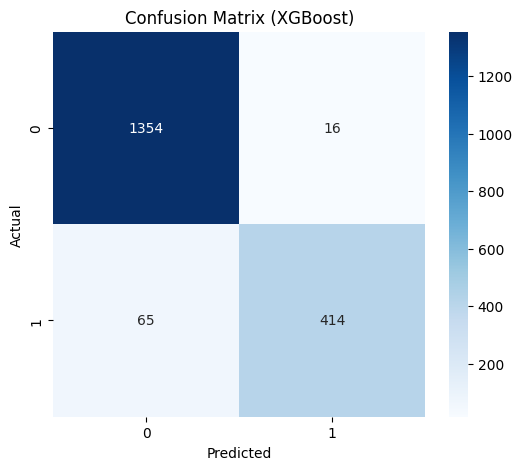

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion matrix 계산
cm = confusion_matrix(y_test, pred_xgb)

# 라벨 지정 (클래스 개수에 맞게 수정)
labels = sorted(y_test.unique())

# 히트맵 그리기
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()


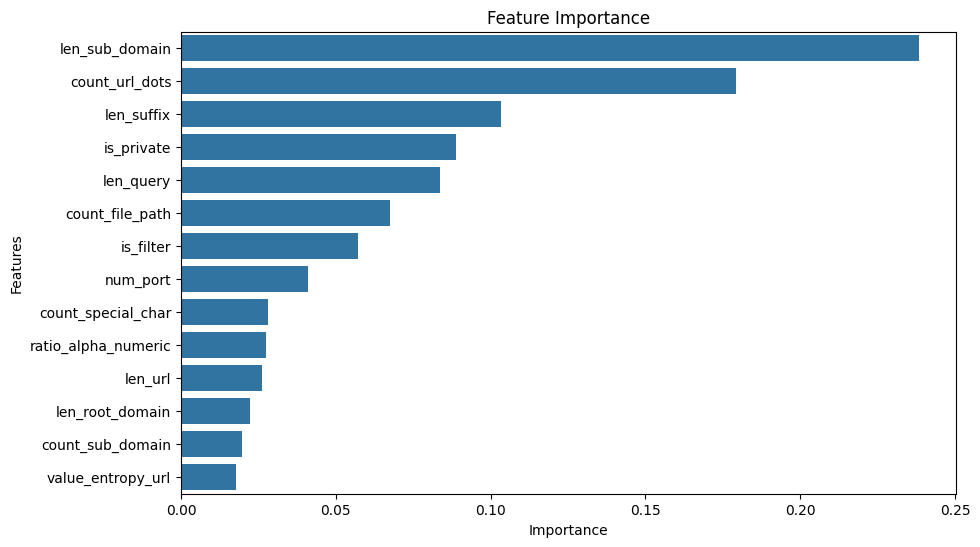

In [ ]:
#importance의 기준은, label(기준)을 판단할 때 어떤 Feature의 중요도가 높은지를 판단

#  모델 특성 중요도 추출
importances = model_xgb.feature_importances_

# 특성 중요도를 데이터프레임으로 변환
feature_importances = pd.DataFrame({'Feature': x.columns,
                                    'Importance': importances})

# 특성 중요도를 내림차순으로 정렬
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# 차트 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

----------------------------------------------------

In [ ]:
# 1. 라이브러리 호출하기
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 2. 데이터 셋이 있다고 가정하고, train_test_split으로 분리
# 예시: x_train, x_test, y_train, y_test가 이미 분리되어 있다고 가정

# 3. 모델 선언하기 (max_features를 None 또는 'sqrt', 'log2'로 설정)
model_rf = RandomForestClassifier(
    n_estimators=100,            # 트리 개수
    min_samples_split=2,         # 노드 분할을 위한 최소 샘플 수
    min_samples_leaf=1,          # 리프 노드가 되기 위한 최소 샘플 수
    max_features='sqrt',         # 최대 feature 개수 ('sqrt' 권장)
    max_depth=None,              # 트리의 최대 깊이
    max_leaf_nodes=None,         # 리프 노드의 최대 개수
    #random_state=77
)

# 4. 모델 학습하기
model_rf.fit(x_train, y_train)

# 5. 예측하기
pred_rf = model_rf.predict(x_test)

# 6. 성능 평가하기 (정확도)
accuracy = accuracy_score(y_test, pred_rf)
print(f"Random Forest 모델 정확도: {accuracy:.4f}")

# Q. 매번 실행할 때 마다 모델의 정확도가 달라지는 이유는?

Random Forest 모델 정확도: 0.9502


In [ ]:
# 여기에 작성하세요.
# 라이브러리 불러오기 (Hint: from sklearn.metrics import ?????)

from sklearn.metrics import classification_report, f1_score, confusion_matrix
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

# 성능 평가하기 (Hint: f1_score(???, ???)
print("F1 Score : ", f1_score(y_test, pred_rf))



[[1352   18]
 [  74  405]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1370
           1       0.96      0.85      0.90       479

    accuracy                           0.95      1849
   macro avg       0.95      0.92      0.93      1849
weighted avg       0.95      0.95      0.95      1849

F1 Score :  0.8980044345898004


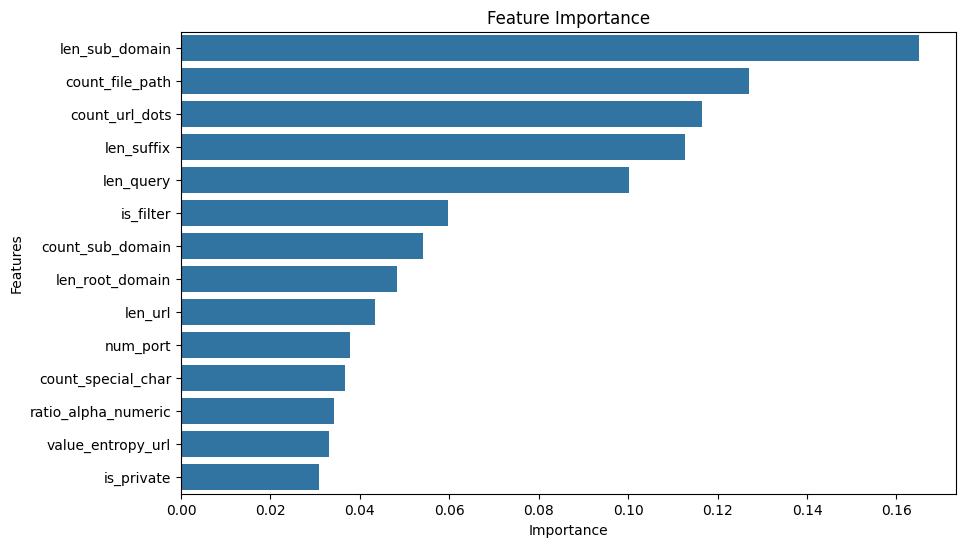

In [ ]:
# 그대로 사용하셔도 무관합니다.
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest 모델 특성 중요도 추출
importances = model_rf.feature_importances_

# 특성 중요도를 데이터프레임으로 변환
feature_importances = pd.DataFrame({'Feature': x.columns,
                                    'Importance': importances})

# 특성 중요도를 내림차순으로 정렬
feature_importances = feature_importances.sort_values('Importance', ascending=False)
# 차트 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
import joblib

# model 저장
model_dt = joblib.dump(model_xgb, './model_xgb_이정민.pkl')
model_rf = joblib.dump(model_rf, './model_rf_이정민.pkl')
